# Groupwork Assignment Submission 2 M5 - Group 4B

In [18]:
#Importing the libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from fredapi import Fred

# Downloading data

In [19]:
# Download 2 years of price history of a stock.
data_frame = yf.download('USDEUR=X', start='2019-05-06', end='2020-05-06', progress=False) # yyyy/mm/dd
data_frame.drop(['Open', 'Volume', 'Adj Close'], axis=1, inplace=True)
#print(data_frame)

#  Effective Federal Funds Rate downloaded from https://fred.stlouisfed.org/series/FEDFUNDS
##################################################
fred = Fred(api_key='267a686a16fe42c7b7defdc69c762c7c')
IRdf = fred.get_series('DFF', '5/6/2019', '5/6/2020') # mm/dd/yyyy

IRdiff=IRdf # loading the difference of the Fed funds rate and ECB refinancing rate 


2019-05-06    2.40
2019-05-07    2.40
2019-05-08    2.39
2019-05-09    2.38
2019-05-10    2.38
dtype: float64

# Explanatory Variables computation

In [20]:
def Historical_D_days_trend(data, D):
    return ( data/data.shift(D-1, axis=0) )-1

def Line_trend(data, w):
    return (data['High'].rolling(window=w).max() + data['Low'].rolling(window=w).min())/2

def StochasticOsclillator(data):
    temp_df = pd.DataFrame(data=data)
    temp_df['LowMin'] = data['Low'].rolling(window=14).min()
    temp_df['HighMax'] = data['High'].rolling(window=14).max()
    return (data['Close']-temp_df['LowMin'])/(temp_df['HighMax']-temp_df['LowMin'])

In [21]:

data_frame['StochasticOsclillator'] = StochasticOsclillator(data_frame)

data_frame['3-period MA of %K %D'] = data_frame['StochasticOsclillator'].rolling(window=3).mean()
data_frame['3-period MA of %D'] = data_frame['3-period MA of %K %D'].rolling(window=3).mean()
data_frame['ConvLine'] = Line_trend(data_frame, 9)
data_frame['BaseLine'] = Line_trend(data_frame, 26)
data_frame['SenkouSpanA'] = (data_frame['BaseLine'] + data_frame['ConvLine'])/2
data_frame['Historical 4-day trend'] = Historical_D_days_trend(data_frame['Close'], 4)
data_frame['Historical 8-day trend'] = Historical_D_days_trend(data_frame['Close'], 8)
data_frame['Historical 16-day trend'] = Historical_D_days_trend(data_frame['Close'], 16)
data_frame['Historical 32-day trend'] = Historical_D_days_trend(data_frame['Close'], 32)

df = data_frame [31:] 
df.drop(['LowMin', 'HighMax'], axis=1, inplace=True)

df.head(7)

/Users/dhruv/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,High,Low,Close,StochasticOsclillator,3-period MA of %K %D,3-period MA of %D,ConvLine,BaseLine,SenkouSpanA,Historical 4-day trend,Historical 8-day trend,Historical 16-day trend,Historical 32-day trend
Date,,,,,,,,,,,,,
2019-06-19,0.89376,0.89110,0.89300,0.672364,0.590422,0.471410,0.887735,0.890665,0.88920,0.007344,0.010890,-0.002458,-0.001107
2019-06-20,0.89001,0.88377,0.88980,0.585832,0.597055,0.550221,0.887935,0.890665,0.88930,-0.001907,0.007085,-0.008999,-0.003260
2019-06-21,0.88624,0.88235,0.88530,0.313693,0.523963,0.570480,0.887935,0.890665,0.88930,-0.006286,0.003002,-0.014560,-0.009255
2019-06-24,0.87921,0.87710,0.87837,0.073966,0.324497,0.481838,0.885685,0.888615,0.88715,-0.016383,-0.007828,-0.018504,-0.016372
2019-06-25,0.87886,0.87612,0.87717,0.057854,0.148504,0.332322,0.885195,0.888125,0.88666,-0.014194,-0.010513,-0.013507,-0.015632
2019-06-26,0.88099,0.87800,0.87951,0.186777,0.106199,0.193067,0.885195,0.888125,0.88666,-0.006540,-0.013449,-0.010196,-0.011742
2019-06-27,0.88118,0.87850,0.87914,0.166394,0.137008,0.130571,0.885195,0.888125,0.88666,0.000877,-0.013200,-0.012812,-0.012502


# Performing the PCA

[0.49441181 0.18333965 0.11133997 0.09407832 0.04808811 0.03182073
 0.02407789 0.01143838 0.00140516]


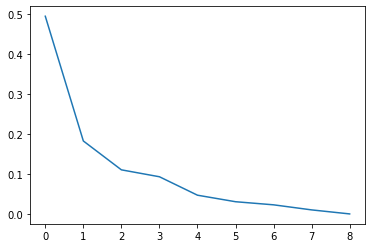

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=9)

PCAData = pd.DataFrame(list(zip(IRdiff,df['StochasticOsclillator'], df['3-period MA of %K %D'],
                                df['3-period MA of %D'], df['SenkouSpanA'],df['Historical 4-day trend'],
                                df['Historical 8-day trend'],df['Historical 16-day trend'],
                                df['Historical 32-day trend'])))

PCAData = StandardScaler().fit_transform(PCAData)

pca.fit_transform(PCAData)

print(pca.explained_variance_ratio_)
plt.plot(range(0, 9), pca.explained_variance_ratio_)

# Finding the PCA components responsible for majority of variation in explanatory variables

In [23]:
pca = PCA(n_components=6)

pca.fit_transform(PCAData)

print(np.round(pca.components_,2))

[[-0.02  0.43  0.44  0.4   0.09  0.27  0.39  0.37  0.31]
 [-0.57 -0.13 -0.05  0.05  0.71 -0.24 -0.16  0.08  0.25]
 [-0.15 -0.05 -0.31 -0.49  0.11  0.71  0.26 -0.05  0.22]
 [-0.68  0.22  0.16  0.07 -0.21  0.15  0.09 -0.25 -0.56]
 [-0.01 -0.06 -0.12 -0.1   0.04  0.14 -0.22  0.83 -0.45]
 [-0.04 -0.39 -0.16  0.02  0.01 -0.32  0.82  0.13 -0.16]]
